# Neural Layer Network with One Hidden Layer

epoch 1 / 10: Train_loss 4.553227, train_acc: 0.106500, val_acc: 0.106000 , Val_Loss: 4.553940
epoch 2 / 10: Train_loss 3.143130, train_acc: 0.413500, val_acc: 0.403000 , Val_Loss: 3.156263
epoch 3 / 10: Train_loss 2.423043, train_acc: 0.590500, val_acc: 0.531000 , Val_Loss: 2.462204
epoch 4 / 10: Train_loss 2.191910, train_acc: 0.590000, val_acc: 0.567000 , Val_Loss: 2.186906
epoch 5 / 10: Train_loss 1.994910, train_acc: 0.621000, val_acc: 0.582000 , Val_Loss: 2.103960
epoch 6 / 10: Train_loss 1.784451, train_acc: 0.620000, val_acc: 0.602000 , Val_Loss: 1.913655
epoch 7 / 10: Train_loss 1.810012, train_acc: 0.628000, val_acc: 0.604000 , Val_Loss: 1.893664
epoch 8 / 10: Train_loss 1.610533, train_acc: 0.692000, val_acc: 0.637000 , Val_Loss: 1.710806
epoch 9 / 10: Train_loss 1.687951, train_acc: 0.657500, val_acc: 0.632000 , Val_Loss: 1.756460
epoch 10 / 10: Train_loss 1.540389, train_acc: 0.690500, val_acc: 0.656000 , Val_Loss: 1.649298
Test Accuracy is :67.83333333333333
Validation Ac

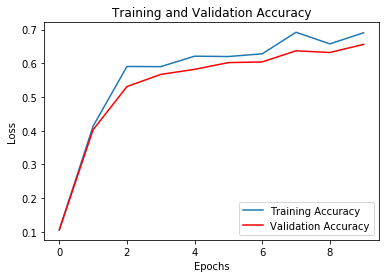

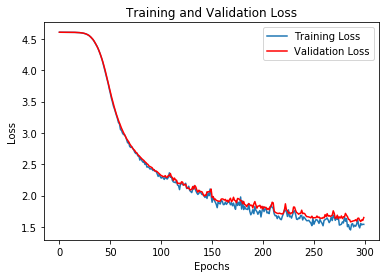

In [5]:
# import util_mnist_reader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Loading the dataset from given Scripts utilutil_mnist_reader
X_train, y_train = util_mnist_reader.load_mnist('/Users/saikumaraindla/Documents/ML/proj2code/data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('/Users/saikumaraindla/Documents/ML/proj2code/data/fashion', kind='t10k')

#Splitting the test set into test set and Validation set
X_test, x_validate, y_test, y_validate = train_test_split(
    X_test, y_test, test_size=0.1, random_state=12345)

class NN_layer():
    
    # Initializing Weights and biases
    def __init__(self,hidden_nodes,output_labels,input_size, a = 0.0001):
        self.param = {}    
        self.param['w1'] = a * np.random.randn(input_size, hidden_nodes)   
        self.param['b1'] = np.zeros((1, hidden_nodes))    
        self.param['w2'] = a * np.random.randn(hidden_nodes, output_labels)   
        self.param['b2'] = np.zeros((1, output_labels))

    # Feed_Forward Network
    def feed_forward(self,x,y,reg):
        w1 = self.param['w1']
        w2 = self.param['w2']
        b1 = self.param['b1']
        b2 = self.param['b2']
        
        input_size = x.shape[0]
        z1 = np.dot(x, w1) + b1
        # ReLu Activation Function
        a1 = ReLu(z1)
        hidden_out = np.dot(a1, w2) + b2
        hidden_out_max = np.max(hidden_out, axis=1, keepdims=True)    
        z2 = np.exp(hidden_out - hidden_out_max)   
        # Softmax activation Function
        a2 = softmax(z2)
        
        #Calculation of Loss
        log_a2 = -np.log(a2[range(input_size), y]) 
        normal_loss = np.sum(log_a2) / input_size
        reg_loss = 0.5 * reg * np.sum(w1*w1) + 0.5 * reg * np.sum(w2*w2)
        Loss = normal_loss + normal_loss
        parameters ={
            'a1':a1,
            'a2': a2,
            'z1':z1,
            'z2':z2,
            'w1':w1,
            'w2':w2,
            'b1':b1,
            'b2':b2
        }
        return Loss, parameters
    
    # Back Propagation and Updating the Weights and biases of both input layer and hidden layer using regularization
    # parameters and Learning rate
    def Backpropagate_Update(self,Parameters,x,y,Lr,reg):
        input_size = x.shape[0]
        mean = 0.9
        W2, bias2 = 0.0, 0.0
        W1, bias1 = 0.0, 0.0
        a2 = Parameters['a2']
        a1 = Parameters['a1']
        w2 = Parameters['w2']
        z1 = Parameters['z1']
        w1 = Parameters['w1']
        b1 = Parameters['b1']
        b2 = Parameters['b2']
        
        #Back Propagating 
        a2[range(input_size), y] -= 1
        a2 /= input_size
        dw2 = np.dot(a1.T, a2)                     
        db2 = np.sum(a2, axis=0, keepdims=True)    
        da1 = np.dot(a2, w2.T)                     
        da1[a1 <= 0] = 0  
        dw1 = np.dot(x.T, da1)                         
        db1 = np.sum(da1, axis=0, keepdims=True)      
        dw2 += reg * w2
        dw1 += reg * w1

        #Updating Weights
        W2 = mean * W2 - Lr * dw2
        self.param['w2'] += W2   
        bias2 = mean * bias2 - Lr * db2    
        self.param['b2'] += bias2   
        W1 = mean * W1 - Lr * dw1   
        self.param['w1'] += W1   
        bias1 = mean * bias1 - Lr * db1  
        self.param['b1'] += bias1

        Updated_Param = {'w1':w1,'w2':w2,'b2':b2,'b1':b1}
        return Updated_Param

    #Training the Neural Network
    def Neural_Network_Train(self,x,y,x_validate,y_validate,epochs,batching,Learning_rate, 
               learning_rate_decay,flag=False):
        reg=1e-5
        tuning_param = 0.9
        Train_Loss_Track = []
        Train_Acc_Track = []
        Val_Loss_Track = []
        Val_Acc_Track = []
        num_train = x.shape[0]
        iterations_per_epoch = max(int(num_train / batching), 1)
        
        for epoch in range(1, epochs * iterations_per_epoch + 1):
            
            #Creating a batch to train
            batch = np.random.choice(num_train, batching, replace=True)   
            X_batch = x[batch,:]       
            y_batch = y[batch] 
            
            #Training set Feed Forward
            Train_Loss,Train_Parameters = self.feed_forward(X_batch,y_batch,reg)
            Train_Loss_Track.append(np.squeeze(Train_Loss))

            #Validation set Feed Forward
            Val_Loss,Parameters = self.feed_forward(x_validate,y_validate,reg)
            Val_Loss_Track.append(np.squeeze(Val_Loss))

            #Back Propagation and Updating using Training set parameters
            Updated_Parameters = self.Backpropagate_Update(Train_Parameters,X_batch,y_batch,Learning_rate,reg)
            
            #Calculating the Accuracies and Loss
            if flag and epoch % iterations_per_epoch == 0:    
                epoch_range = epoch / iterations_per_epoch    
                Train_acc = (self.predict(X_batch) == y_batch).mean()
                Val_acc = (self.predict(x_validate) == y_validate).mean() 
                Train_Acc_Track.append(Train_acc)    
                Val_Acc_Track.append(Val_acc)    
                print("epoch %d / %d: Train_loss %f, train_acc: %f, val_acc: %f , Val_Loss: %f" % 
                                    (epoch_range, epochs, Train_Loss, Train_acc, Val_acc, Val_Loss))
                Learning_rate *= learning_rate_decay  
        
        #Returning Train set Validation set Accuracies and Loss to predict graphs
        return Train_Loss_Track,Val_Loss_Track,Train_Acc_Track,Val_Acc_Track
    
    #Prediction Function for testing
    def predict(self, X):    
        y_pred = None    
        z1 = np.dot(X, self.param['w1']) + self.param['b1']   
        a1= ReLu(z1)
        z2 = np.dot(a1, self.param['w2']) + self.param['b2']    
        y_pred = np.argmax(z2, axis=1)    

        return y_pred

#ReLu Activation Function
def ReLu(x):    
    return np.maximum(0, x)

#Softmax Activation Function
def softmax(x):
    return x / np.sum(x, axis=1, keepdims=True)

#Program Starts from here
def __init__():
    input_size = X_train.shape[1]
    hidden_nodes = 15
    output_labels = 10
    Learning_rate = 0.0005
    learning_rate_decay = 0.95
    epochs = 10
    batching = 2000
    ob1 = NN_layer(hidden_nodes,output_labels,input_size)
    
    #Calling Neural Network Train Method
    Train_Loss_Track,Val_Loss_Track,Train_Acc_Track,Val_Acc_Track = ob1.Neural_Network_Train(X_train,y_train, 
                                                            x_validate, y_validate,epochs, batching,Learning_rate,
                                                               learning_rate_decay,flag=True)
    #Test Set Accuracy and Validation set Accuracy
    test_acc = (ob1.predict(X_test) == y_test).mean()
    val_acc = (ob1.predict(x_validate) == y_validate).mean() 
    print("Test Accuracy is :"+str(test_acc*100))
    print("Validation Accuracy is :"+str(val_acc*100))
    
    #Training and Validation Accuracies for Epochs
    plt.figure()
    plt1 = plt.plot(Train_Acc_Track,label = "Training Accuracy")
    plt2 = plt.plot(Val_Acc_Track,label = "Validation Accuracy",color = "red")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show
    

    #Training and Validation loss vs number of epochs graph
    plt.figure()
    plt1 = plt.plot(Train_Loss_Track,label = "Training Loss")
    plt2 = plt.plot(Val_Loss_Track,label = "Validation Loss",color = "red")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show

__init__()

# Multilayer Neural Network

Using TensorFlow backend.


x_train shape: (60000, 28, 28) y_train shape: (60000,)


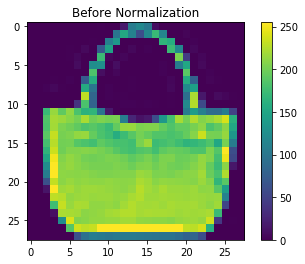

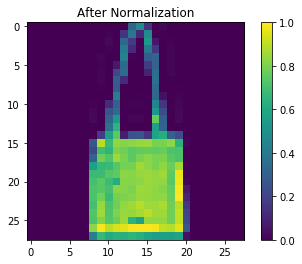

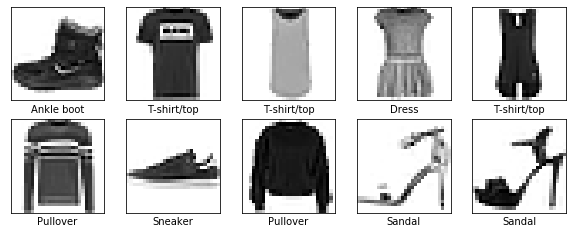

Loss and Accuracy of Neural network on training set
Train on 60000 samples, validate on 1000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.4939 - accuracy: 0.8239 - val_loss: 0.4472 - val_accuracy: 0.8390
Epoch 2/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.3722 - accuracy: 0.8638 - val_loss: 0.4144 - val_accuracy: 0.8540
Epoch 3/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.3349 - accuracy: 0.8752 - val_loss: 0.3699 - val_accuracy: 0.8680
Epoch 4/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3132 - accuracy: 0.8836 - val_loss: 0.4274 - val_accuracy: 0.8520
Epoch 5/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.2950 - accuracy: 0.8891 - val_loss: 0.3591 - val_accuracy: 0.8700
Epoch 6/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.2811 - accuracy: 0.8940 - val_loss: 0.3778 - val_accuracy: 0.8720
Epoch 7/10


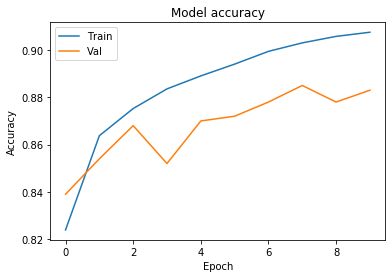

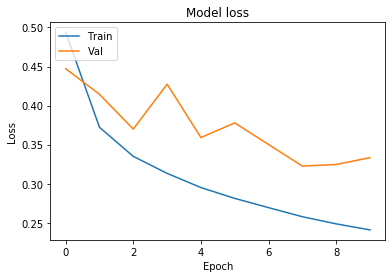

Evaluating Testing Set
9000/9000 [==============================] - 0s 54us/step
Model - 6 layers - test loss: 33.86122891373105
Model - 6 layers - test accuracy: 88.2777750492096


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Load the fashion-mnist from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

#Image Picture before Normalization that shows scaling from 0 to 255
plt.figure()
plt.title("Before Normalization")
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)
plt.show()

#Normalizig the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#Dividing the test further into validation set and test set
x_test, x_validate, y_test, y_validate = train_test_split(
    x_test, y_test, test_size=0.1, random_state=12345,
)

#Image Picture before Normalization that shows scaling from 0 to 1
plt.figure()
plt.imshow(x_train[200])
plt.title("After Normalization")
plt.colorbar()
plt.grid(False)
plt.show()

#Creating the class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#Sample pictures of 10 images classified into their respective classes 
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


#Creating a MNN with three hidden layers
model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#optimizing the model using learning rate and cross entropy
model_5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Loss and Accuracy of Neural Network on training set
print("Loss and Accuracy of Neural network on training set")
history =  model_5.fit(x_train, y_train, epochs=10,validation_data = [x_validate,y_validate])

#Getting the model summary
model_5.summary()


# Plot Training and Validation Accuracies vs number of epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


#Evaluating the model for test set
print("Evaluating Testing Set")
test_loss, test_acc = model_5.evaluate(x_test, y_test)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

# Convolutional Neural Network

x_train shape: (60000, 28, 28) y_train shape: (60000,)


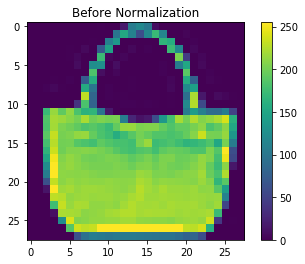

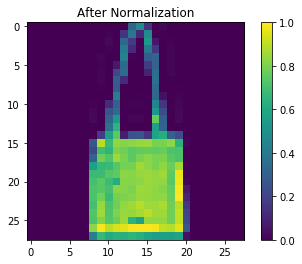

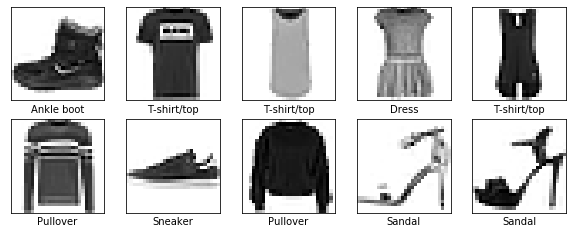

x_train shape: (60000, 28, 28, 1)
x_test shape: (9000, 28, 28, 1)
x_validate shape: (1000, 28, 28, 1)
Loss and Accuracy of Neural network on training set
Train on 60000 samples, validate on 1000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 396us/step - loss: 0.7472 - accuracy: 0.7538 - val_loss: 0.5063 - val_accuracy: 0.8200
Epoch 2/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.4276 - accuracy: 0.8505 - val_loss: 0.4374 - val_accuracy: 0.8500
Epoch 3/10
60000/60000 [==============================] - 27s 457us/step - loss: 0.3787 - accuracy: 0.8680 - val_loss: 0.4123 - val_accuracy: 0.8470
Epoch 4/10
60000/60000 [==============================] - 24s 403us/step - loss: 0.3515 - accuracy: 0.8770 - val_loss: 0.3795 - val_accuracy: 0.8700
Epoch 5/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.3325 - accuracy: 0.8843 - val_loss: 0.3648 - val_accuracy: 0.8720
Epoch 6/10
60000/60000 [============================

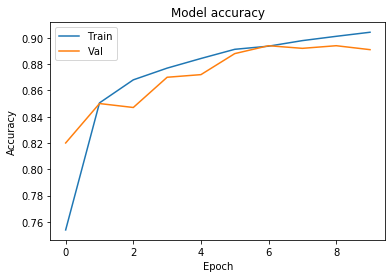

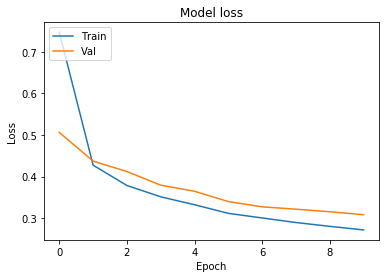

test loss: 0.2941
 test acc: 0.8932


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the fashion-mnist from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)


#Creating the class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Image Picture before Normalization that shows scaling from 0 to 255
plt.figure()
plt.title("Before Normalization")
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)
plt.show()

#Normalizig the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#Dividing the test further into validation set and test set
x_test, x_validate, y_test, y_validate = train_test_split(
    x_test, y_test, test_size=0.1, random_state=12345,
)

#Image Picture before Normalization that shows scaling from 0 to 1
plt.figure()
plt.imshow(x_train[200])
plt.title("After Normalization")
plt.colorbar()
plt.grid(False)
plt.show()

#Sample pictures of 10 images classified into their respective classes 
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))


#Creating a Convolutional model with Conv2d, one MaxPool, one hidden, one Output layers
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

#optimizing the model using learning rate and cross entropy
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

#Loss and Accuracy of Neural Network on training set
print("Loss and Accuracy of Neural network on training set")
history = cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data = [x_validate,y_validate]
)

#Getting the model summary
cnn_model.summary()

# Plot Training and Validation Accuracies vs number of epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values vs number of epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#Evaluating the model for test set
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))